In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/i1.csv")
df2 = pd.read_csv("/content/i2.csv")

merged = pd.merge(df1, df2,how="outer")
merged.to_csv("merged.csv", index=False)

In [ ]:
from google.colab import files
files.download("merged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged.shape

(15621, 16)

In [ ]:
merged.isna()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15616,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
15617,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
15618,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
15619,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB


In [ ]:
merged.describe()

,Invoice No.,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Covers,HSN
count,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15613.000000,15621.0,0.0
mean,25989.963127,116.608988,1.338839,147.407080,1.262818,7.303668,153.447930,18.068340,0.0,NaN
std,1433.192998,63.663769,0.949814,210.127442,6.656396,10.461474,219.678163,17.191377,0.0,NaN
min,23465.000000,12.000000,1.000000,12.000000,0.000000,0.000000,12.600000,1.000000,0.0,NaN
25%,24751.000000,50.000000,1.000000,80.000000,0.000000,4.000000,84.000000,4.000000,0.0,NaN
50%,25980.000000,140.000000,1.000000,150.000000,0.000000,7.000000,147.000000,12.000000,0.0,NaN
75%,27274.000000,160.000000,1.000000,170.000000,0.000000,8.500000,178.500000,26.000000,0.0,NaN
max,28389.000000,770.000000,28.000000,21560.000000,288.000000,1078.000000,22638.000000,50.000000,0.0,NaN


In [ ]:
merged.isna().sum()

,0
Date,0
Timestamp,0
Invoice No.,0
Item Name,0
Price,0
Qty.,0
Sub Total,0
Discount,0
Tax,0
Final Total,0


In [ ]:
merged['Invoice No.'].nunique()

4925

In [ ]:
merged['Invoice No.'].unique()

array([23465, 23466, 23467, ..., 28387, 28388, 28389])

In [ ]:
merged['Final Total'].sum()

np.float64(2397010.12)

In [ ]:
Average_total = merged['Final Total'].sum()/ merged['Invoice No.'].nunique()
print(Average_total)

486.70256243654825


In [ ]:
invoice_total=merged.groupby(merged['Invoice No.'])['Final Total'].sum()
invoice_total.loc[28327]

np.float64(1081.5)

In [ ]:
merged['Qty.'].sum()

np.float64(20914.0)

In [ ]:
fav=merged.groupby("Item Name")['Qty.'].sum().sort_values(ascending=False)
fav.head(5)

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0
Romali Roti (1 No),822.0
Lemon Soda,722.0


Text(0.5, 1.0, 'Favorite Items')

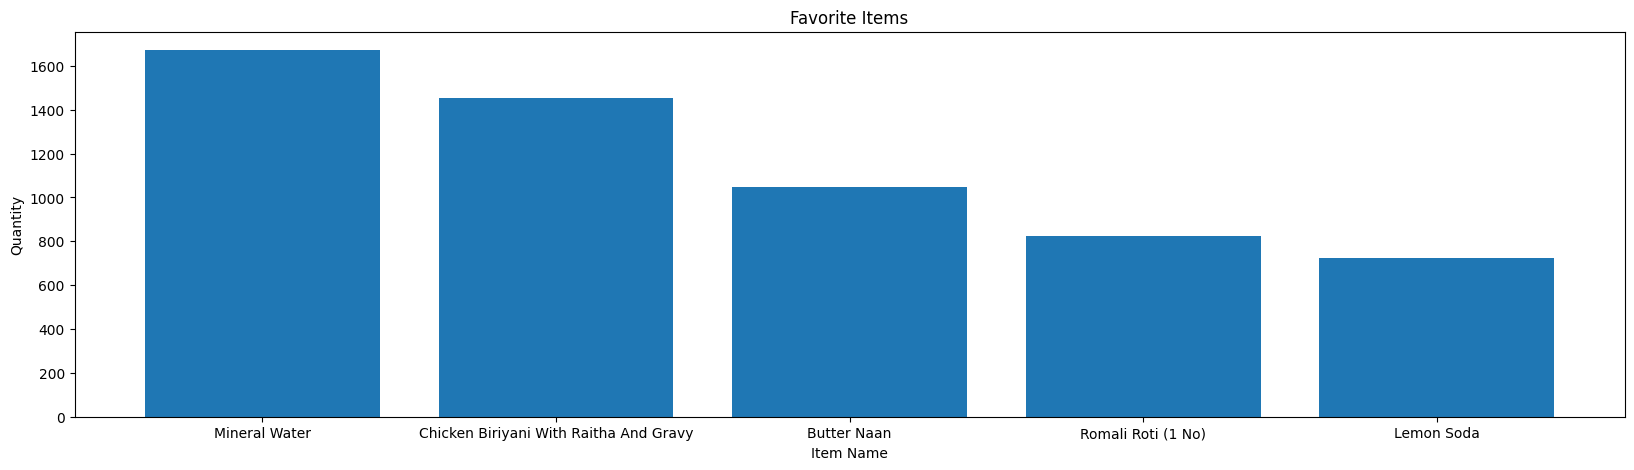

In [ ]:
import matplotlib.pyplot as plt
fav_top=merged.groupby("Item Name")['Qty.'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(20,5))
plt.bar(fav_top.index,fav_top.values)
plt.xlabel("Item Name")
plt.ylabel("Quantity")
plt.title("Favorite Items")

In [ ]:
fav_rev=merged.groupby("Item Name")['Final Total'].sum().sort_values(ascending=False)
fav_rev.head(5)

,Final Total
Item Name,
Chicken Biriyani With Raitha And Gravy,240730.96
Chicken Fried Rice,119347.20
Butter Naan,65387.74
Thandoor Chicken Half,53185.83
Paneer Butter Masala,49581.22


In [ ]:
df=merged[merged['Date']=='2023-09-14']
df.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
14980,2023-09-14,2023-09-14 13:27:37,28192,Masala Omelet (two Eggs,40.0,1.0,40.0,0.0,2.0,42.0,9.0,biller,0,NaN,NON VEG STARTERS EGG,NaN
14981,2023-09-14,2023-09-14 13:27:37,28192,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.5,157.5,9.0,biller,0,NaN,Veg Gravy,NaN
14982,2023-09-14,2023-09-14 13:27:37,28192,Romali Roti (1 No),50.0,2.0,100.0,0.0,5.0,105.0,9.0,biller,0,NaN,Indian Breads,NaN
14983,2023-09-14,2023-09-14 13:31:07,28193,Veg Fried Rice,130.0,1.0,130.0,0.0,6.5,136.5,6.0,biller,0,NaN,VEG BIRYANI & RICE,NaN
14984,2023-09-14,2023-09-14 13:31:52,28194,Mineral Water,20.0,1.0,20.0,0.0,1.0,21.0,50.0,biller,0,NaN,Deserts & Mocktails,NaN


In [ ]:
inovice_find=df.groupby("Invoice No.")['Final Total'].sum().sort_values(ascending=False).head(3)
inovice_find

,Final Total
Invoice No.,
28215,1492.20
28195,1218.00
28220,1005.52


In [ ]:
Avg_Total=merged['Final Total'].mean()
Avg_Total

np.float64(153.44793035016966)

In [ ]:
Invoice=(merged.groupby("Invoice No.")['Final Total'].sum()>
merged.groupby("Invoice No.")['Final Total'].sum().mean()).sum()
Invoice

np.int64(1458)

In [ ]:
merged[]